In [1]:
from PIL import Image
from io import BytesIO
import os, sys, requests, json, random, math, imageio, shutil, glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage.filters import threshold_otsu
from skimage.io import imread, imsave
from skimage.color import rgb2gray
from skimage.measure import label, regionprops
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
sys.path.append('../preprocessing')
from utility import crop_img, removeBorderBox

In [2]:
phase_count = {
    "train": 1,
    "test": 1
}

In [3]:
# get images from pf_ext
# labels = os.path.join('Pf_ext_01.json')

count = 1

phase = "train"

data = (requests.get('https://raw.githubusercontent.com/RTANC/malaria_dataset/master/Falciparum/pf-ext-copy.json')).json()
images = data["_via_img_metadata"]
for key in images:
    url = images[key]["filename"]
    leng = len(images[key]["regions"])
    bboxs = ""
    if leng > 0 and count <= 20:
        print("{} {}".format(count,url))
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        w, h = img.size
        rects = []
        for box in images[key]["regions"]:
            b = box["shape_attributes"]
            lbl = box["region_attributes"]["type"]
            if lbl == "2":
                lbl = "1"
            elif lbl == "1":
                lbl = "0"
            rects.append(BoundingBox(x1=b["x"],y1=b["y"],x2=(b["x"] + b["width"]),y2=(b["y"] + b["height"]),label=int(lbl)))
            
        img = np.array(img)
        bbs = BoundingBoxesOnImage(rects,shape=img.shape)
        phase_count = crop_img(img, bbs, phase_count, offset=15)
        break

1 https://raw.githubusercontent.com/RTANC/malaria_dataset/master/tmp_images/0000015250.jpg
pf-train-0000000001
2 45 pf-train-0000000002
3 90 pf-train-0000000003
4 135 pf-train-0000000004
5 180 pf-train-0000000005
6 225 pf-train-0000000006
7 270 pf-train-0000000007
8 315 pf-train-0000000008
9 flipLR pf-train-0000000009
10 45 pf-train-0000000010
11 90 pf-train-0000000011
12 135 pf-train-0000000012
13 180 pf-train-0000000013
14 225 pf-train-0000000014
15 270 pf-train-0000000015
16 315 pf-train-0000000016
17 flipUD pf-train-0000000017
18 45 pf-train-0000000018
19 90 pf-train-0000000019
20 135 pf-train-0000000020
21 180 pf-train-0000000021
22 225 pf-train-0000000022
23 270 pf-train-0000000023
24 315 pf-train-0000000024
25 flipUD pf-train-0000000025
26 45 pf-train-0000000026
27 90 pf-train-0000000027
28 135 pf-train-0000000028
29 180 pf-train-0000000029
30 225 pf-train-0000000030
31 270 pf-train-0000000031
32 315 pf-train-0000000032
pf-train-0000000033
34 45 pf-train-0000000034
35 90 pf-trai

In [4]:
print(phase_count["train"])

97


In [5]:
# get image from pf_01
# labels = os.path.join('pf_01.json')
count = 1
# degs = [45,90,135,180,225,270,315]
data = (requests.get('https://raw.githubusercontent.com/RTANC/malaria_dataset/master/Falciparum/pf_01-copy.json')).json()
images = data["_via_img_metadata"]
for key in images:
    url = images[key]["filename"]
    leng = len(images[key]["regions"])
    bboxs = ""
    if leng > 0 and count <= 820:
        print("{} {}".format(count,url))
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        w, h = img.size
        rects = []
        for box in images[key]["regions"]:
            b = box["shape_attributes"]
            lbl = box["region_attributes"]["type"]
            rects.append(BoundingBox(x1=b["x"],y1=b["y"],x2=(b["x"] + b["width"]),y2=(b["y"] + b["height"]),label=int(lbl)))
            
        img = np.array(img)
        bbs = BoundingBoxesOnImage(rects,shape=img.shape)
        phase_count = crop_img(img, bbs, phase_count, offset=15)
        break

1 http://map.ku.ac.th/imglabel/via/datasets/pf_ring/01/Data20200115-01_Wholeslide_Default_Extended_i01j17.jpg
pf-train-0000000097
98 45 pf-train-0000000098
99 90 pf-train-0000000099
100 135 pf-train-0000000100
101 180 pf-train-0000000101
102 225 pf-train-0000000102
103 270 pf-train-0000000103
104 315 pf-train-0000000104
105 flipLR pf-train-0000000105
106 45 pf-train-0000000106
107 90 pf-train-0000000107
108 135 pf-train-0000000108
109 180 pf-train-0000000109
110 225 pf-train-0000000110
111 270 pf-train-0000000111
112 315 pf-train-0000000112
113 flipUD pf-train-0000000113
114 45 pf-train-0000000114
115 90 pf-train-0000000115
116 135 pf-train-0000000116
117 180 pf-train-0000000117
118 225 pf-train-0000000118
119 270 pf-train-0000000119
120 315 pf-train-0000000120
121 flipUD pf-train-0000000121
122 45 pf-train-0000000122
123 90 pf-train-0000000123
124 135 pf-train-0000000124
125 180 pf-train-0000000125
126 225 pf-train-0000000126
127 270 pf-train-0000000127
128 315 pf-train-0000000128


In [6]:
print(phase_count["train"])

129


1 https://raw.githubusercontent.com/RTANC/malaria_dataset/master/Falciparum/pf_test/16.jpg
pf-test-0000000001
2250 1687


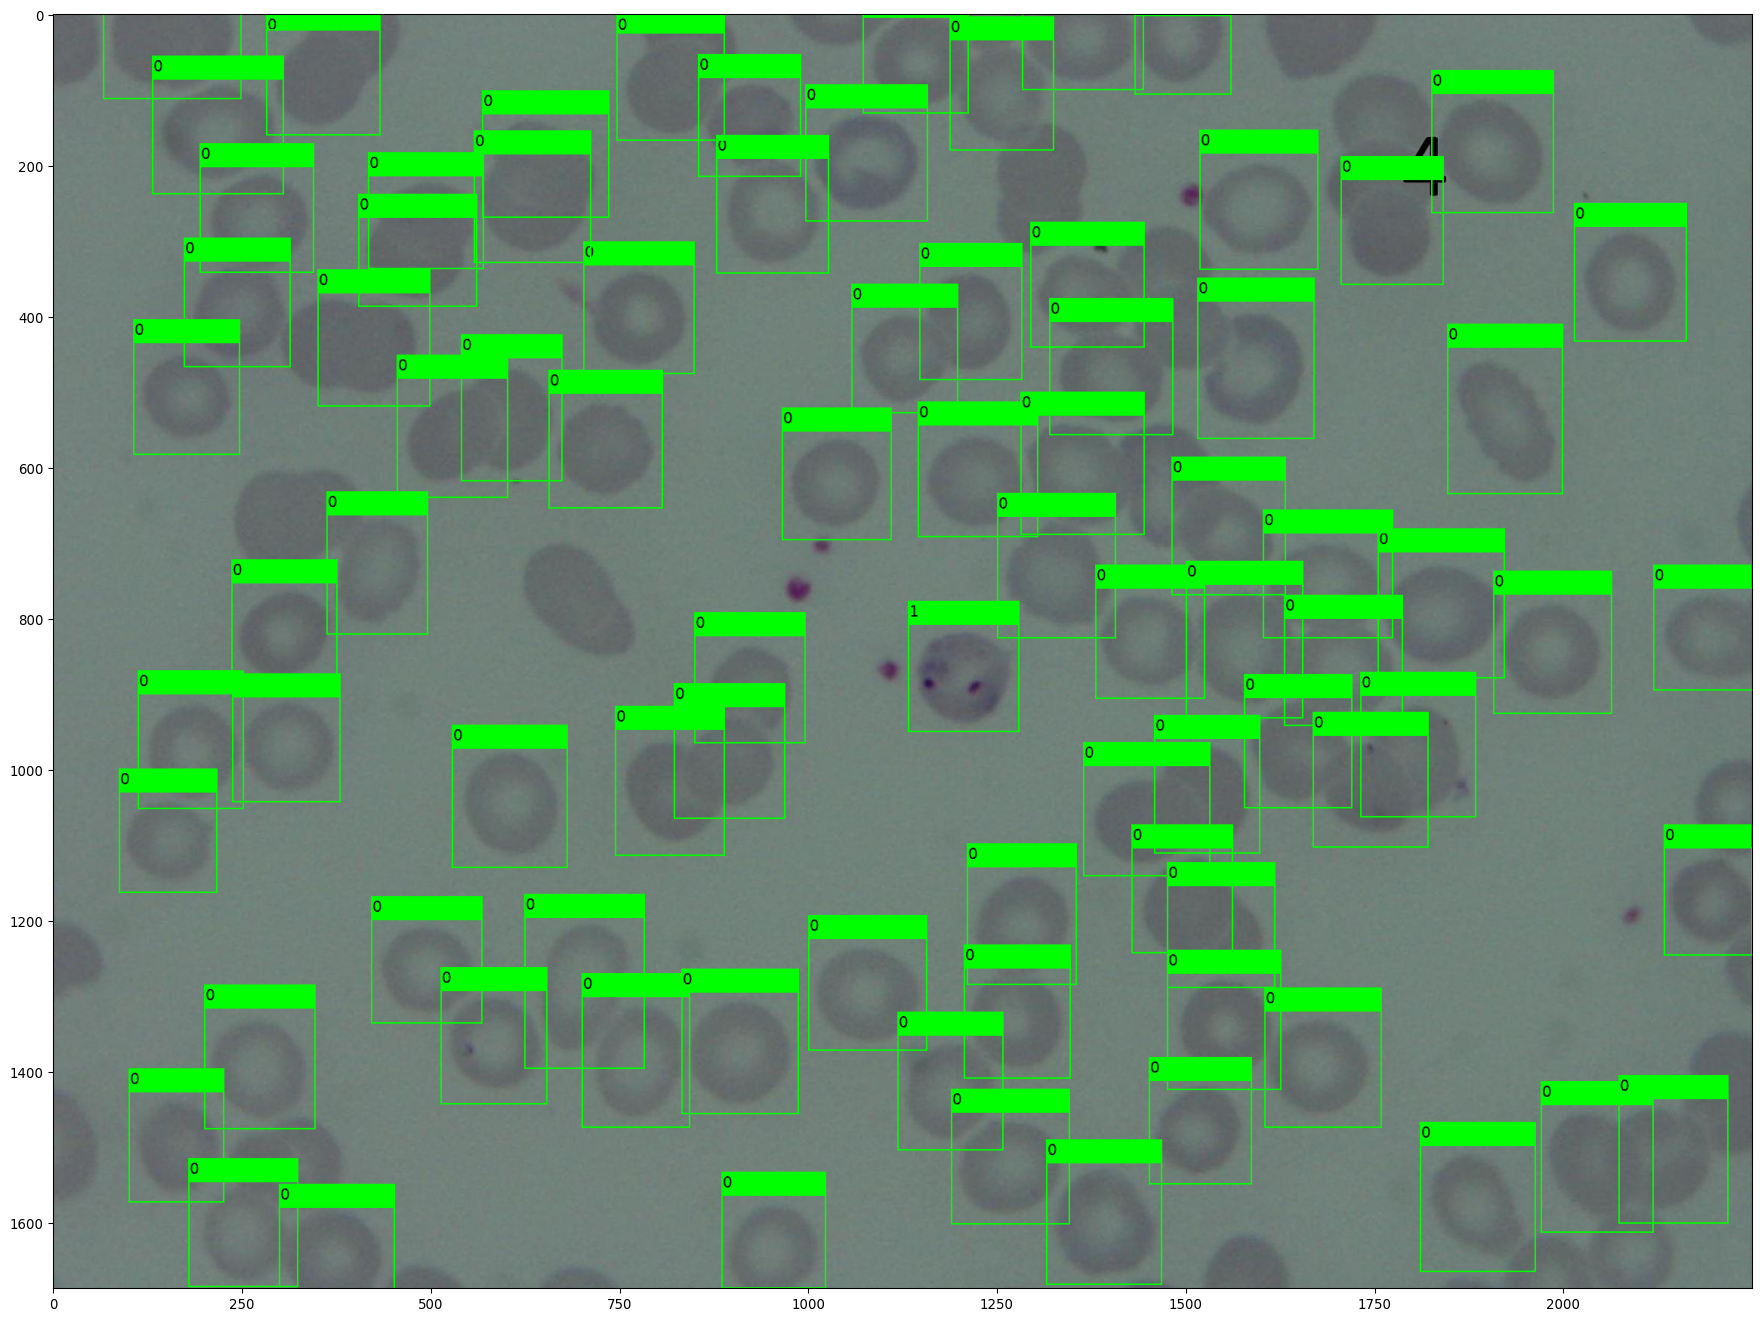

2496 2080


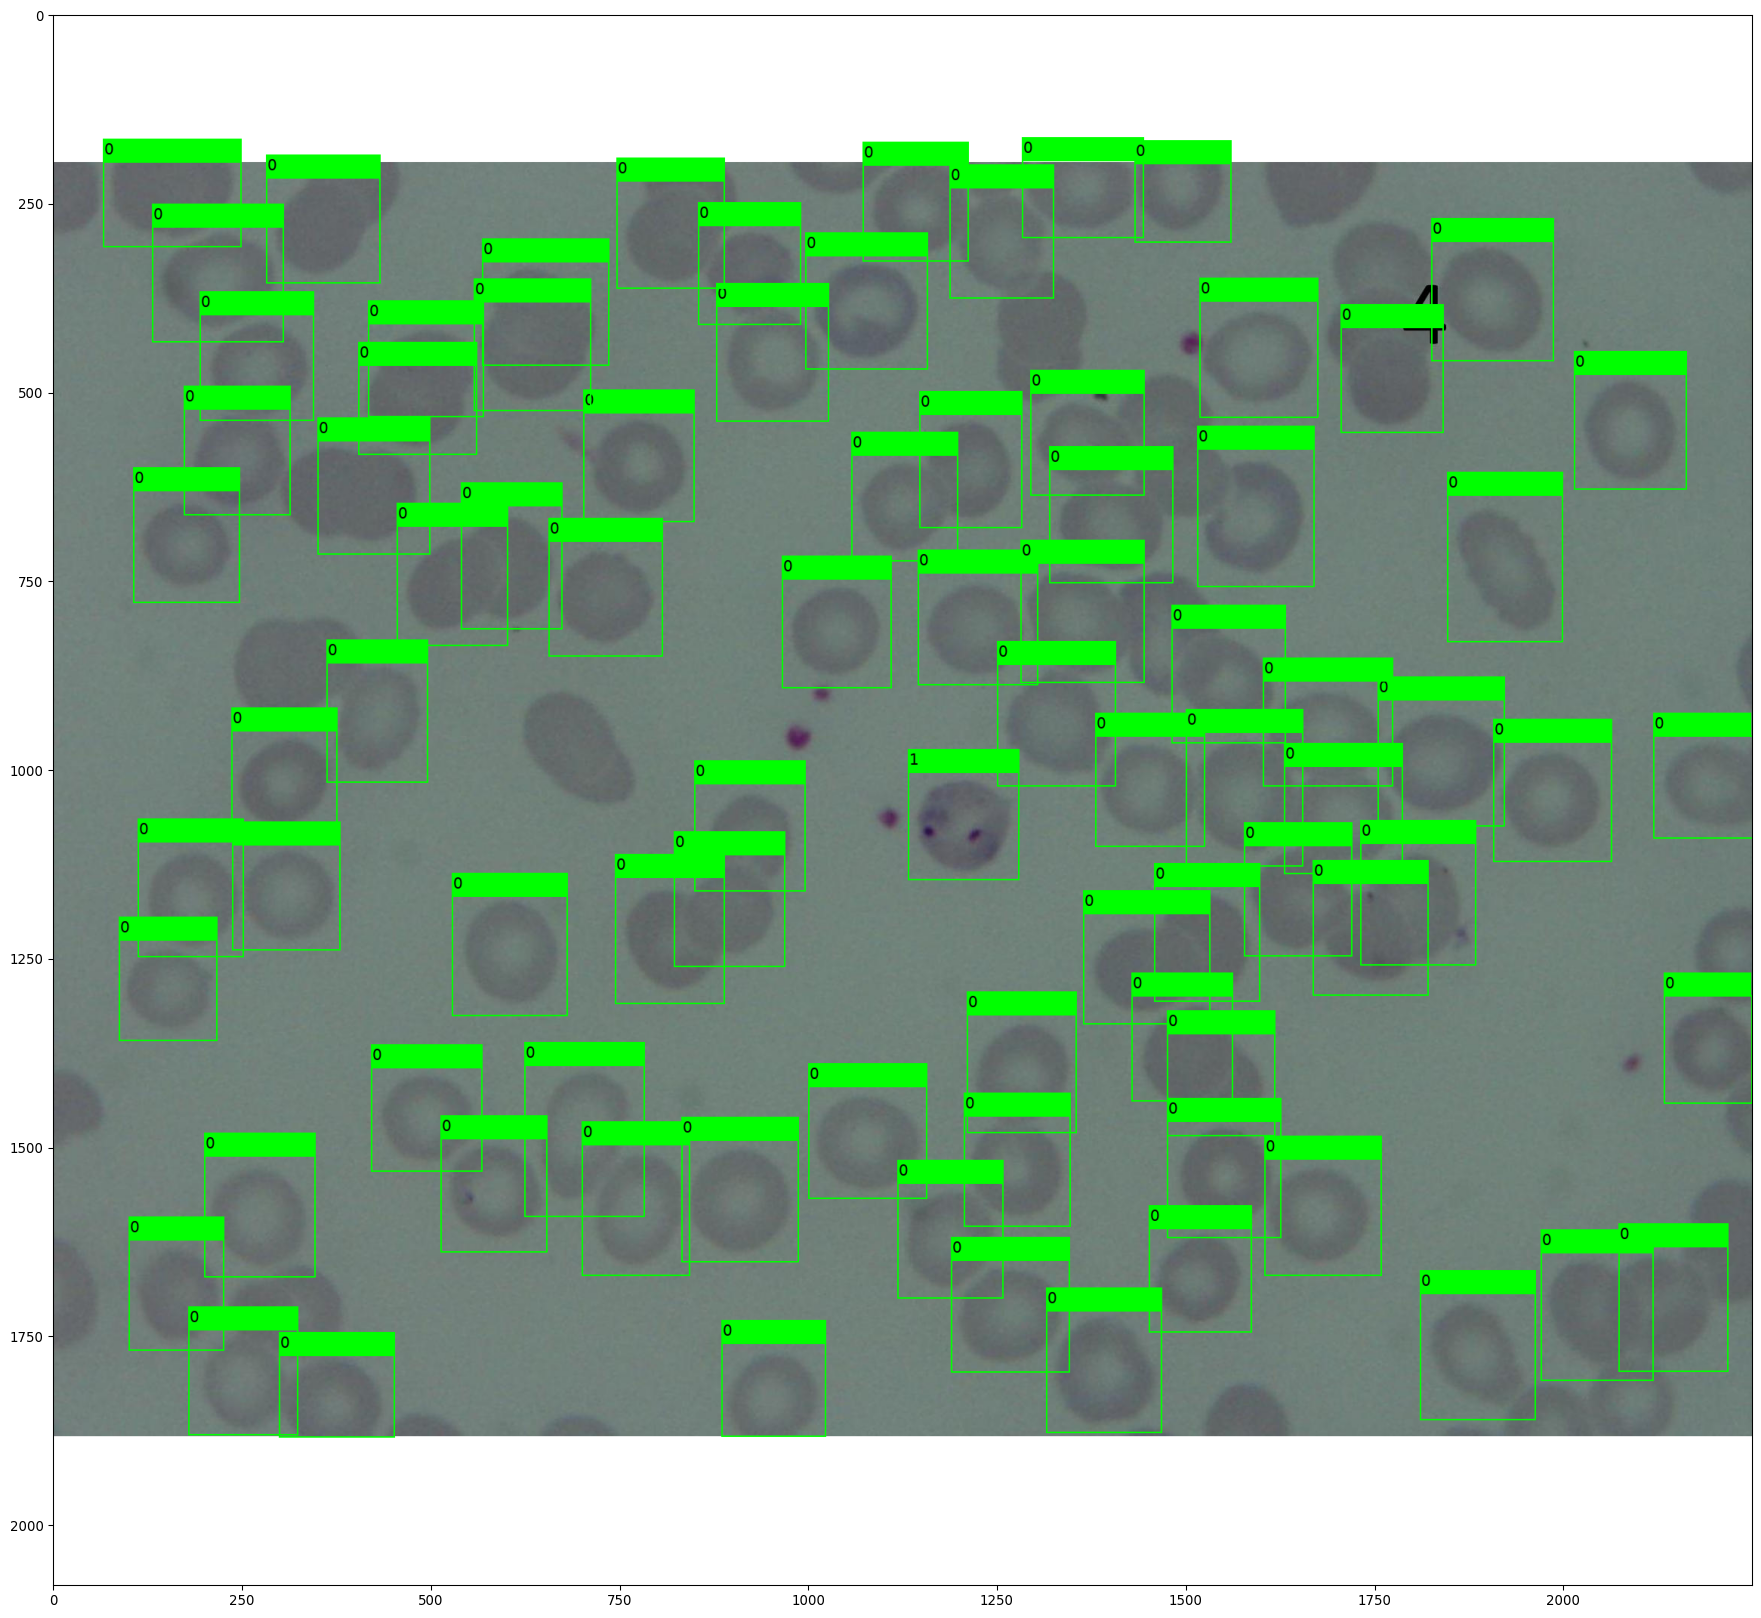

5
0.0
0.2
0.4
0.6
0.8


In [11]:
# get image from pf_test
# labels = os.path.join('pf_test.json')

count = 1

phase = "test"

data = (requests.get('https://raw.githubusercontent.com/RTANC/malaria_dataset/master/Falciparum/pf_test.json')).json()
images = data["_via_img_metadata"]
for key in images:
    url = images[key]["filename"]
    leng = len(images[key]["regions"])
    bboxs = ""
    if leng > 0:
        name = "pf-" + phase + "-{:010d}".format(phase_count[phase])
        print("{} {}".format(count,url))
        print(name)
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        w, h = img.size
        print("{} {}".format(w,h))
        rects = []
        for box in images[key]["regions"]:
            b = box["shape_attributes"]
            lbl = box["region_attributes"]["type"]
            rects.append(BoundingBox(x1=b["x"],y1=b["y"],x2=(b["x"] + b["width"]),y2=(b["y"] + b["height"]),label=int(lbl)))
        img = np.array(img)
        bbs = BoundingBoxesOnImage(rects,shape=img.shape)
        wp = w + (416 - (w % 416))
        hp = h + (416 - (h % 416))
        
        ia.imshow(bbs.draw_on_image(img,size=2))
        print("{} {}".format(wp,hp))

        img_pad, bbs_pad = iaa.PadToFixedSize(width=hp, height=hp, pad_mode="constant", pad_cval=255, position="center")(image=img, bounding_boxes=bbs)
        ia.imshow(bbs_pad.draw_on_image(img_pad, size=2))

        stepx = int(hp / 416)
        print(stepx)
        for x in range(0, hp, 416):
            print(x / hp)
        # img_crop, bbs_crop = iaa.CropToFixedSize(width=416, height=416, position=(0, 1))(image=img_crop, bounding_boxes=bbs_crop)
        # clip_of_img = bbs_pad.remove_out_of_image(fully=True,partly=False).clip_out_of_image()
        # clip_of_img, _ = removeBorderBox(img_pad, bbs_pad)
        # print(clip_of_img)
        # ia.imshow(clip_of_img.draw_on_image(img_pad, size=2))
        break
        # for y2 in range(416, hp + 1, 416):
        #     for x2 in range(416, wp + 1, 416):
        #         x1 = x2 - 416
        #         y1 = y2 - 416
        #         img_crop, bbs_crop = iaa.Crop(px=(0,0,416,416), keep_size=False)(image=img_pad, bounding_boxes=bbs_pad)
        #         ia.imshow(bbs_crop.draw_on_image(img_crop, size=2))
        #         print("{} {} {} {}".format(x1,y1,x2,y2))
        #         break
        #     break
        # break
        # count += 1
        # phase_count[phase] += 1

In [12]:
print(img_pad.shape)

(2080, 2250, 3)


In [ ]:
# get image from pf_02 (Test set)
# labels = os.path.join('pf_02.json')

count = 1

phase = "test"
degs = [45,90,135,180,225,270,315]

data = (requests.get('https://raw.githubusercontent.com/RTANC/malaria_dataset/master/Falciparum/pf_02.json')).json()
images = data["_via_img_metadata"]
for key in images:
    url = images[key]["filename"]
    leng = len(images[key]["regions"])
    bboxs = ""
    if leng > 0 and count <= 100:
        name = "pf-" + phase + "-{:010d}".format(phase_count[phase])
        print("{} {}".format(count,url))
        print(name)
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        w, h = img.size
        img.save(os.path.join('../data/custom/images',name+".jpg"))
        f = open(os.path.join('../data/custom/labels',name+".txt"),'w')
        for box in images[key]["regions"]:
            b = box["shape_attributes"]
            x1 = b["x"]/w
            y1 = b["y"]/h
            bw = b["width"]/w
            bh = b["height"]/h
            xc = x1 + (bw/2)
            yc = y1 + (bh/2)
            lbl = box["region_attributes"]["type"]
            if lbl == "2":
                lbl = "1"
                bboxs += "\n"+ lbl + " " + str(xc) + " " + str(yc) + " " + str(bw) + " " + str(bh)
            elif lbl == "0":
                lbl = "0"
                bboxs += "\n"+ lbl + " " + str(xc) + " " + str(yc) + " " + str(bw) + " " + str(bh)
        bboxs = bboxs[1:]
        f.write(bboxs)
        f.close()
        phase_count[phase] += 1
    count += 1